In [12]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle
import re
pd.set_option('display.max_columns', None)

### Download Stock Data

In [16]:

stock_period = ('2010/01/01','2021/12/31')
stock_list = ['^TWII','0050']

for stock in stock_list: 
    try:
        print(f'Start Download {stock}')
        if stock != '^TWII':
            stock = stock+'.TW'
        df = pdr.DataReader(stock, 'yahoo', start=stock_period[0], end=stock_period[1])
        stock = re.sub('\^|.TW', '', stock)
        output_path = os.path.join('data',f'{stock}.csv')
        df = df.dropna()
        print(f'save data to {output_path}')
        df.to_csv(output_path)
        # df.head()
    except:
        print(f'  {stock} Download Fail')

df.head() 


Start Download ^TWII
save data to data\TWII.csv
Start Download 0050
save data to data\0050.csv


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,56.650002,56.049999,56.450001,56.500000,20069,56.500000
2010-01-05,56.900002,56.150002,56.799999,56.500000,16430,56.500000
2010-01-06,57.750000,56.500000,56.500000,57.549999,18953,57.549999
2010-01-07,58.150002,57.299999,57.599998,57.400002,14101,57.400002
2010-01-08,57.750000,57.049999,57.299999,57.750000,11324,57.750000


### Split Data to Train & Test

In [37]:

stock = 'TWII'
train_year = ('2015','2019')
test_year = ('2020','2021')
data = pd.read_csv(f'data/{stock}.csv',index_col=0)
# data = pd.DataFrame(data, index = data.index, columns = data.columns)

# display(data.head())
# display(data.describe())

# create train set
train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{stock}_train.csv'
print('Train Data:',output_path)
train.to_csv(output_path)

# create scaler 
scalerfile = f'scaler/{stock}_train_scaler.sav'
print('Scaler File:',scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(train)
pickle.dump(scaler, open(scalerfile, 'wb'))
# scaler = pickle.load(open(scalerfile, 'rb'))

# create scaler 
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
output_path = f'data/{stock}_test.csv'
print('Test Data:',output_path)
test.to_csv(output_path)
display(train.head())
display(test.head())

Train Data: data/TWII_train.csv
Scaler File: scaler/TWII_train_scaler.sav
Test Data: data/TWII_test.csv


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,8326.330078,8109.089844,8315.790039,8114.259766,1717400.0,8114.229004
2016-01-05,8142.640137,8055.959961,8105.000000,8075.109863,1710600.0,8075.079102
2016-01-06,8076.540039,7948.430176,8064.250000,7990.390137,2040600.0,7990.359375
2016-01-07,7980.500000,7770.160156,7963.240234,7852.060059,2544700.0,7852.030273
2016-01-08,7906.549805,7788.709961,7811.200195,7893.970215,1875700.0,7893.939941


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,14937.129883,14720.250000,14720.250000,14902.030273,6487600.0,14902.030273
2021-01-05,15000.030273,14861.990234,14913.639648,15000.030273,6302200.0,15000.030273
2021-01-06,15197.679688,14837.000000,15145.849609,14983.129883,7787000.0,14983.129883
2021-01-07,15270.400391,15049.860352,15059.519531,15214.000000,5878900.0,15214.000000
2021-01-08,15463.950195,15275.379883,15365.129883,15463.950195,6192800.0,15463.950195


### Plot Train & Test 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


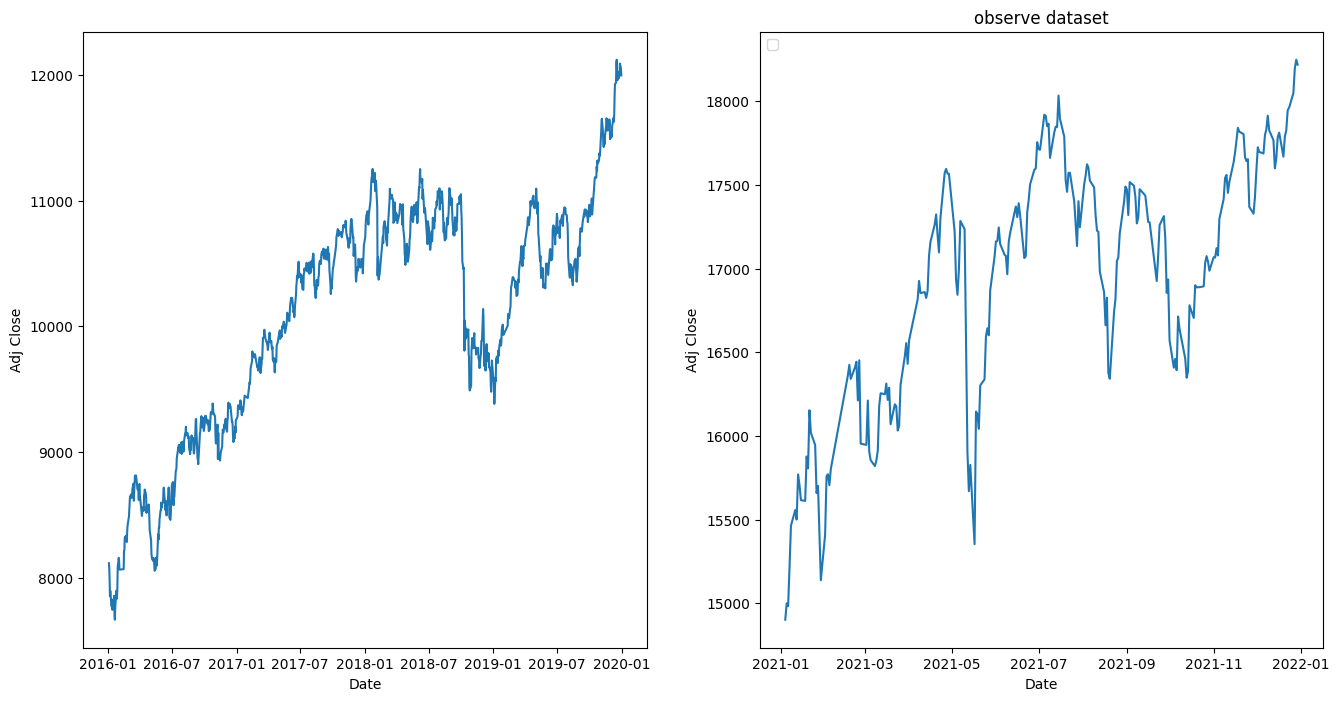

In [35]:
train.index = pd.to_datetime(train.index,format='%Y-%m-%d')
test.index = pd.to_datetime(test.index,format='%Y-%m-%d')
# y_max = max(max(train.apply(max)),max(test.apply(max)))
# y_max = y_max+y_max*0.1
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=100)
sns.lineplot(data=train['Adj Close'],ax=ax[0])
sns.lineplot(data=test['Adj Close'],ax=ax[1])
# ax[0].set_ylim(0,y_max)
# ax[1].set_ylim(0,y_max)
plt.title(f'observe dataset')
# plt.legend(loc='upper left')